Estudiante: Emanuel Acevedo


El entregable debe contener.

(0.5) Realizar un diccionario de datos clasificando cada variable de acuerdo con su tipo, naturaleza, escala y descripción como politómica, dicotómica, discreta, continua.

(1.0) En caso de ser necesario, verifique tipos de datos y variables. Realice un cuadro df.describe() y comente por lo menos 5 hallazgos significativos.

(1.0) Realice 5 gráficas o tablas para completar un análisis exploratorio.  Documente los hallazgos más importantes.

(1.0) Realice transformaciones para limpiar y completar la base de datos con lo encontrado anteriormente. Impute si es necesario.

(1.0) Convierta todas las variables categóricas a numéricas, de acuerdo con el criterio adecuado.

(0.5) ¿Sería necesario estandarizar o normalizar alguna variable? ¿Por qué?

Importamos librerias

In [314]:
import pandas as pd #Manejo de dataframes
import numpy as np #Manejo de listas
import matplotlib.pyplot as plt #Graficación
import seaborn as sns #Graficación
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Importamos datos

In [315]:
df = pd.read_csv('censopoblacional_crudo.csv', sep=";", encoding='latin-1')
df.head()

Nombre  Edad  Annos de experiencia        Estado civil  \
0  Karrie Trusslove    39                    13       Never-married   
1  Brandise Tripony    50                    13  Married-civ-spouse   
2     Brenn McNeely    38                     9            Divorced   
3       Dorry Poter    53                     7  Married-civ-spouse   
4       Dick Honnan    28                    13  Married-civ-spouse   

           Ocupación  Género  Horas por semana País de origen Target  
0       Adm-clerical    Male              40.0  United-States  <=50K  
1    Exec-managerial    Male              13.0  United-States  <=50K  
2  Handlers-cleaners    Male              40.0  United-States  <=50K  
3  Handlers-cleaners    Male              40.0  United-States  <=50K  
4     Prof-specialty  Female              40.0           Cuba  <=50K

In [316]:
df['Target'].value_counts()

Target
<=50K    24716
>50K      7841
Name: count, dtype: int64

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nombre                32561 non-null  object 
 1   Edad                  32561 non-null  int64  
 2   Annos de experiencia  32561 non-null  int64  
 3   Estado civil          32561 non-null  object 
 4   Ocupación             30718 non-null  object 
 5   Género                32561 non-null  object 
 6   Horas por semana      32555 non-null  float64
 7   País de origen        31978 non-null  object 
 8   Target                32557 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.2+ MB


In [318]:
df.describe()

Edad  Annos de experiencia  Horas por semana
count  32561.000000          32561.000000      32555.000000
mean      38.594945             10.086207         40.437199
std       13.779450              2.672047         12.347377
min       17.000000              1.000000          1.000000
25%       28.000000              9.000000         40.000000
50%       37.000000             10.000000         40.000000
75%       48.000000             12.000000         45.000000
max      370.000000            120.000000         99.000000

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nombre                32561 non-null  object 
 1   Edad                  32561 non-null  int64  
 2   Annos de experiencia  32561 non-null  int64  
 3   Estado civil          32561 non-null  object 
 4   Ocupación             30718 non-null  object 
 5   Género                32561 non-null  object 
 6   Horas por semana      32555 non-null  float64
 7   País de origen        31978 non-null  object 
 8   Target                32557 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.2+ MB


<Axes: xlabel='Género', ylabel='count'>

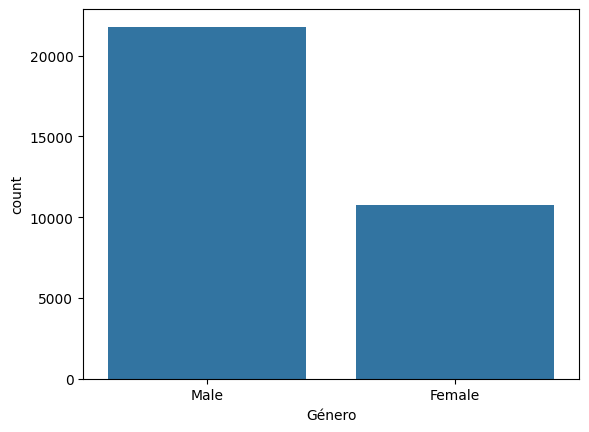

In [320]:
sns.countplot(x='Género', data=df) # Graficos de columnas - Son exclusivos de variables categoricas

<Axes: xlabel='Estado civil', ylabel='count'>

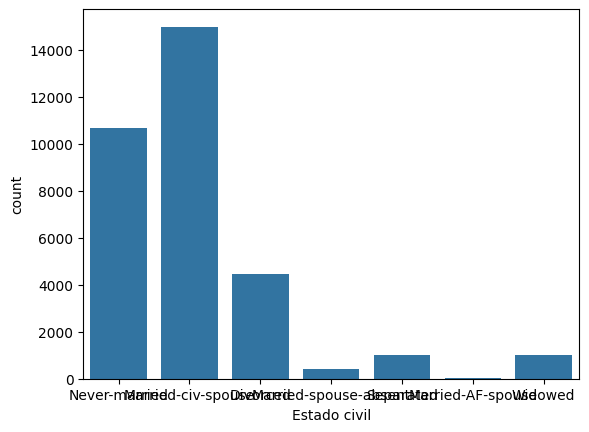

In [321]:
sns.countplot(x='Estado civil', data=df) # Graficos de columnas

In [322]:
df['Estado civil'].value_counts()

Estado civil
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

<Axes: xlabel='Ocupación', ylabel='count'>

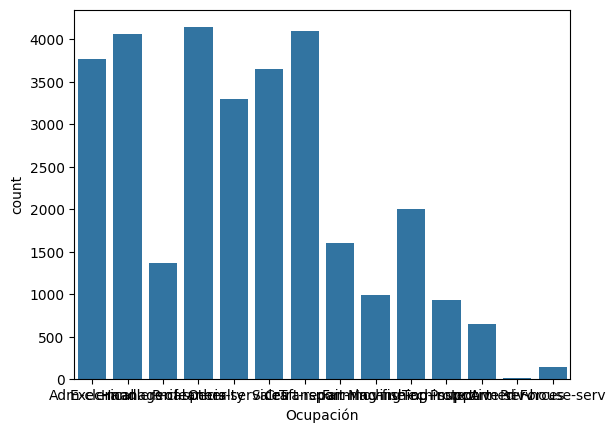

In [323]:
sns.countplot(x='Ocupación', data=df) # Graficos de columnas

In [324]:
df['Ocupación'].value_counts()

Ocupación
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

<Axes: xlabel='Annos de experiencia'>

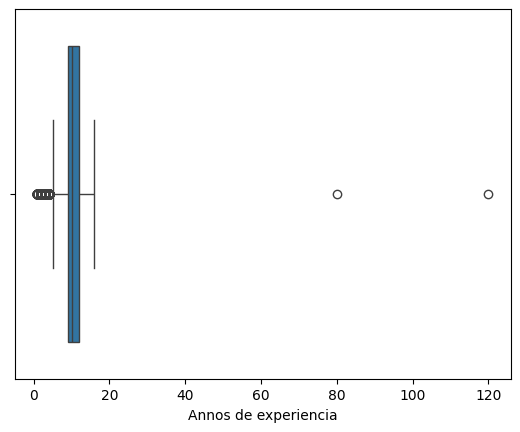

In [325]:
sns.boxplot(x='Annos de experiencia', data=df)

<Axes: xlabel='Edad'>

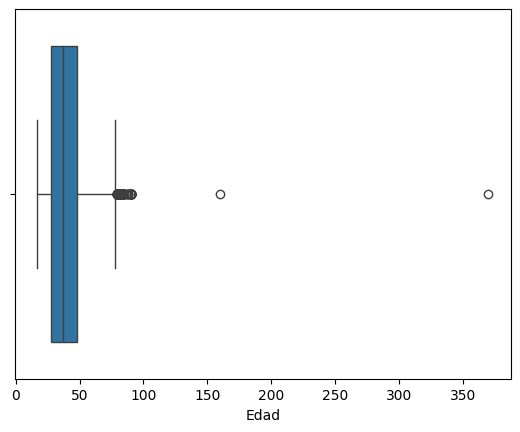

In [326]:
sns.boxplot(x='Edad', data=df)

<Axes: xlabel='Horas por semana'>

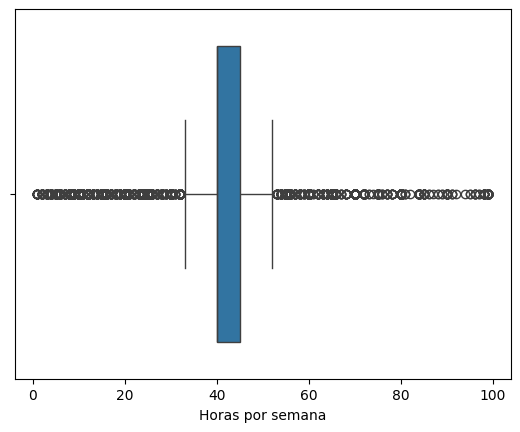

In [327]:
sns.boxplot(x='Horas por semana', data=df)

In [328]:
table = pd.pivot_table(df, values='Annos de experiencia', index=['Género'], aggfunc=np.mean)
table

<ipython-input-328-f96a35188531>:1: FutureWarning: The provided callable <function mean at 0x7d08d7d15b20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df, values='Annos de experiencia', index=['Género'], aggfunc=np.mean)


Annos de experiencia
Género                      
Female             10.035744
Male               10.111152

In [329]:
table = pd.pivot_table(df, values='Horas por semana', index=['Género'], aggfunc=np.mean)
table

<ipython-input-329-b7edb71e5d19>:1: FutureWarning: The provided callable <function mean at 0x7d08d7d15b20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df, values='Horas por semana', index=['Género'], aggfunc=np.mean)


Horas por semana
Género                  
Female         36.410328
Male           42.427162

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nombre                32561 non-null  object 
 1   Edad                  32561 non-null  int64  
 2   Annos de experiencia  32561 non-null  int64  
 3   Estado civil          32561 non-null  object 
 4   Ocupación             30718 non-null  object 
 5   Género                32561 non-null  object 
 6   Horas por semana      32555 non-null  float64
 7   País de origen        31978 non-null  object 
 8   Target                32557 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.2+ MB


In [331]:
df['Annos de experiencia'].value_counts()

Annos de experiencia
9      10501
10      7291
13      5355
14      1723
11      1382
7       1175
12      1066
6        933
4        646
15       576
5        514
8        432
16       413
3        333
2        168
1         51
120        1
80         1
Name: count, dtype: int64

In [332]:
df[df['Annos de experiencia'] == 120]

Nombre  Edad  Annos de experiencia        Estado civil  \
480  Lucita Kobera    33                   120  Married-civ-spouse   

        Ocupación Género  Horas por semana País de origen Target  
480  Craft-repair   Male              45.0       Portugal  <=50K

In [333]:
df.loc[480, 'Annos de experiencia'] = 12

In [334]:
df.loc[480, 'Annos de experiencia']

12

In [335]:
df[df['Annos de experiencia'] == 80]

Nombre  Edad  Annos de experiencia   Estado civil Ocupación  \
22607  Decca Strivens    19                    80  Never-married     Sales   

      Género  Horas por semana País de origen Target  
22607   Male              40.0  United-States  <=50K

In [336]:
df.loc[22607, 'Annos de experiencia'] = 8

In [337]:
df[df['Annos de experiencia'] == 80]

Empty DataFrame
Columns: [Nombre, Edad, Annos de experiencia, Estado civil, Ocupación, Género, Horas por semana, País de origen, Target]
Index: []

In [338]:
df['Edad'].value_counts()

Edad
36     898
31     888
34     886
23     877
35     876
      ... 
85       3
370      1
160      1
86       1
87       1
Name: count, Length: 75, dtype: int64

In [339]:
df = df[df['Edad'] < 80] # 73 Edad promedio de vida mundial

In [340]:
df

Nombre  Edad  Annos de experiencia        Estado civil  \
0       Karrie Trusslove    39                    13       Never-married   
1       Brandise Tripony    50                    13  Married-civ-spouse   
2          Brenn McNeely    38                     9            Divorced   
3            Dorry Poter    53                     7  Married-civ-spouse   
4            Dick Honnan    28                    13  Married-civ-spouse   
...                  ...   ...                   ...                 ...   
32556       Ardyce Golby    27                    12  Married-civ-spouse   
32557      Jean O'Connor    40                     9  Married-civ-spouse   
32558   Reuben Skrzynski    58                     9             Widowed   
32559        Caye Biddle    22                     9       Never-married   
32560  Hortense Hardesty    52                     9  Married-civ-spouse   

               Ocupación  Género  Horas por semana País de origen Target  
0           Adm-clerical    Male              40.0  United-States  <=50K  
1        Exec-managerial    Male              13.0  United-States  <=50K  
2      Handlers-cleaners    Male              40.0  United-States  <=50K  
3      Handlers-cleaners    Male              40.0  United-States  <=50K  
4         Prof-specialty  Female              40.0           Cuba  <=50K  
...                  ...     ...               ...            ...    ...  
32556       Tech-support  Female              38.0  United-States  <=50K  
32557  Machine-op-inspct    Male              40.0  United-States   >50K  
32558       Adm-clerical  Female              40.0  United-States  <=50K  
32559       Adm-clerical    Male              20.0  United-States  <=50K  
32560    Exec-managerial  Female              40.0  United-States   >50K  

[32438 rows x 9 columns]

In [341]:
df['Horas por semana'].value_counts()

Horas por semana
40.0    15186
50.0     2812
45.0     1822
60.0     1472
35.0     1290
        ...  
82.0        1
94.0        1
92.0        1
87.0        1
74.0        1
Name: count, Length: 94, dtype: int64

In [342]:
df = df[df['Horas por semana'] < 60] # El rango más común de semana laboral está entre las 44 y las 48 horas

In [343]:
df

Nombre  Edad  Annos de experiencia        Estado civil  \
0       Karrie Trusslove    39                    13       Never-married   
1       Brandise Tripony    50                    13  Married-civ-spouse   
2          Brenn McNeely    38                     9            Divorced   
3            Dorry Poter    53                     7  Married-civ-spouse   
4            Dick Honnan    28                    13  Married-civ-spouse   
...                  ...   ...                   ...                 ...   
32556       Ardyce Golby    27                    12  Married-civ-spouse   
32557      Jean O'Connor    40                     9  Married-civ-spouse   
32558   Reuben Skrzynski    58                     9             Widowed   
32559        Caye Biddle    22                     9       Never-married   
32560  Hortense Hardesty    52                     9  Married-civ-spouse   

               Ocupación  Género  Horas por semana País de origen Target  
0           Adm-clerical    Male              40.0  United-States  <=50K  
1        Exec-managerial    Male              13.0  United-States  <=50K  
2      Handlers-cleaners    Male              40.0  United-States  <=50K  
3      Handlers-cleaners    Male              40.0  United-States  <=50K  
4         Prof-specialty  Female              40.0           Cuba  <=50K  
...                  ...     ...               ...            ...    ...  
32556       Tech-support  Female              38.0  United-States  <=50K  
32557  Machine-op-inspct    Male              40.0  United-States   >50K  
32558       Adm-clerical  Female              40.0  United-States  <=50K  
32559       Adm-clerical    Male              20.0  United-States  <=50K  
32560    Exec-managerial  Female              40.0  United-States   >50K  

[29854 rows x 9 columns]

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29854 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nombre                29854 non-null  object 
 1   Edad                  29854 non-null  int64  
 2   Annos de experiencia  29854 non-null  int64  
 3   Estado civil          29854 non-null  object 
 4   Ocupación             28107 non-null  object 
 5   Género                29854 non-null  object 
 6   Horas por semana      29854 non-null  float64
 7   País de origen        29333 non-null  object 
 8   Target                29851 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.3+ MB


In [345]:
df_oc= df[df['Ocupación'].isnull()]
df_oc

Nombre  Edad  Annos de experiencia           Estado civil  \
61         Catlee Antram    32                     4  Married-spouse-absent   
69       Christin Pichan    25                    10          Never-married   
77            Hy Gilliat    67                     6     Married-civ-spouse   
106        Janaya Elloit    17                     6          Never-married   
128     Lucienne Bjerkan    35                     9     Married-civ-spouse   
...                  ...   ...                   ...                    ...   
32490   Corissa Vidineev    60                     5               Divorced   
32530  Emmalynn McKinnon    35                    13     Married-civ-spouse   
32539    Lazar Dalgliesh    71                    16     Married-civ-spouse   
32541       Enid Couttes    41                     9              Separated   
32542       Torrin Godon    72                     9     Married-civ-spouse   

      Ocupación  Género  Horas por semana País de origen Target  
61          NaN    Male              40.0            NaN  <=50K  
69          NaN    Male              40.0  United-States  <=50K  
77          NaN    Male               2.0  United-States  <=50K  
106         NaN  Female              32.0  United-States  <=50K  
128         NaN    Male              40.0  United-States  <=50K  
...         ...     ...               ...            ...    ...  
32490       NaN    Male              35.0  United-States  <=50K  
32530       NaN  Female              55.0  United-States   >50K  
32539       NaN    Male              10.0  United-States   >50K  
32541       NaN  Female              32.0  United-States  <=50K  
32542       NaN    Male              25.0  United-States  <=50K  

[1747 rows x 9 columns]

In [346]:
# Llenamos los NaN de Ocupación con la moda
df['Ocupación'].fillna(df['Ocupación'].mode()[0], inplace=True)

<ipython-input-346-3258c6a41386>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ocupación'].fillna(df['Ocupación'].mode()[0], inplace=True)
<ipython-input-346-3258c6a41386>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ocupación'].fillna(df['Ocupación'].mode()[0], inplace=True)


In [347]:
df_pa= df[df['País de origen'].isnull()]
df_pa

Nombre  Edad  Annos de experiencia           Estado civil  \
14        Rollie Gabbatt    40                    11     Married-civ-spouse   
38     Gwenneth Spriggen    31                    10     Married-civ-spouse   
51            Addy Preon    18                     9          Never-married   
61         Catlee Antram    32                     4  Married-spouse-absent   
93           Nicol Raith    30                     9     Married-civ-spouse   
...                  ...   ...                   ...                    ...   
32254       Kenna Dawtre    31                    10     Married-civ-spouse   
32413      Marve Storres    45                     3     Married-civ-spouse   
32449    Giacinta Carous    44                    14     Married-civ-spouse   
32492        Rabi Thiese    42                     9               Divorced   
32510   Sherwood Jardein    39                     9     Married-civ-spouse   

               Ocupación  Género  Horas por semana País de origen Target  
14          Craft-repair    Male              40.0            NaN   >50K  
38                 Sales    Male              38.0            NaN   >50K  
51         Other-service  Female              30.0            NaN  <=50K  
61          Craft-repair    Male              40.0            NaN  <=50K  
93                 Sales  Female              35.0            NaN  <=50K  
...                  ...     ...               ...            ...    ...  
32254      Other-service    Male              55.0            NaN   >50K  
32413  Machine-op-inspct    Male              40.0            NaN  <=50K  
32449              Sales    Male              50.0            NaN   >50K  
32492              Sales    Male              50.0            NaN  <=50K  
32510     Prof-specialty    Male              45.0            NaN   >50K  

[521 rows x 9 columns]

In [348]:
# Llenamos los NaN de País de origen con la moda
df['País de origen'].fillna(df['País de origen'].mode()[0], inplace=True)

<ipython-input-348-0175a498e8db>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['País de origen'].fillna(df['País de origen'].mode()[0], inplace=True)
<ipython-input-348-0175a498e8db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['País de origen'].fillna(df['País de origen'].mode()[0], inplace=True)


In [349]:
df_oc= df[df['Target'].isnull()]
df_oc

Nombre  Edad  Annos de experiencia   Estado civil  \
26852   Tripp Corston    39                     9      Separated   
26853   Elicia Kiwitz    46                     9       Divorced   
26855  Grayce Merioth    31                    13  Never-married   

               Ocupación  Género  Horas por semana País de origen Target  
26852  Handlers-cleaners    Male              40.0  United-States    NaN  
26853       Craft-repair    Male              40.0  United-States    NaN  
26855              Sales  Female              50.0  United-States    NaN

In [350]:
# Llenamos los NaN de Target con la moda
df['Target'].fillna(df['Target'].mode()[0], inplace=True)

<ipython-input-350-f85c2e317dca>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Target'].fillna(df['Target'].mode()[0], inplace=True)
<ipython-input-350-f85c2e317dca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'].fillna(df['Target'].mode()[0], inplace=True)


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29854 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nombre                29854 non-null  object 
 1   Edad                  29854 non-null  int64  
 2   Annos de experiencia  29854 non-null  int64  
 3   Estado civil          29854 non-null  object 
 4   Ocupación             29854 non-null  object 
 5   Género                29854 non-null  object 
 6   Horas por semana      29854 non-null  float64
 7   País de origen        29854 non-null  object 
 8   Target                29854 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.3+ MB


In [352]:
# Eliminamos la columna Nombre ya que no es requerida posteriormente
columns = ['Edad', 'Annos de experiencia', 'Estado civil', 'Ocupación', 'Género', 'Horas por semana', 'País de origen', 'Target']
df = df[columns]
df

Edad  Annos de experiencia        Estado civil          Ocupación  \
0        39                    13       Never-married       Adm-clerical   
1        50                    13  Married-civ-spouse    Exec-managerial   
2        38                     9            Divorced  Handlers-cleaners   
3        53                     7  Married-civ-spouse  Handlers-cleaners   
4        28                    13  Married-civ-spouse     Prof-specialty   
...     ...                   ...                 ...                ...   
32556    27                    12  Married-civ-spouse       Tech-support   
32557    40                     9  Married-civ-spouse  Machine-op-inspct   
32558    58                     9             Widowed       Adm-clerical   
32559    22                     9       Never-married       Adm-clerical   
32560    52                     9  Married-civ-spouse    Exec-managerial   

       Género  Horas por semana País de origen Target  
0        Male              40.0  United-States  <=50K  
1        Male              13.0  United-States  <=50K  
2        Male              40.0  United-States  <=50K  
3        Male              40.0  United-States  <=50K  
4      Female              40.0           Cuba  <=50K  
...       ...               ...            ...    ...  
32556  Female              38.0  United-States  <=50K  
32557    Male              40.0  United-States   >50K  
32558  Female              40.0  United-States  <=50K  
32559    Male              20.0  United-States  <=50K  
32560  Female              40.0  United-States   >50K  

[29854 rows x 8 columns]

In [353]:
# Creamos variables dummy para convertir
df = pd.get_dummies(data=df, columns=["Ocupación", "Estado civil", "País de origen"])
df.head()

Edad  Annos de experiencia  Género  Horas por semana Target  \
0    39                    13    Male              40.0  <=50K   
1    50                    13    Male              13.0  <=50K   
2    38                     9    Male              40.0  <=50K   
3    53                     7    Male              40.0  <=50K   
4    28                    13  Female              40.0  <=50K   

   Ocupación_Adm-clerical  Ocupación_Armed-Forces  Ocupación_Craft-repair  \
0                    True                   False                   False   
1                   False                   False                   False   
2                   False                   False                   False   
3                   False                   False                   False   
4                   False                   False                   False   

   Ocupación_Exec-managerial  Ocupación_Farming-fishing  ...  \
0                      False                      False  ...   
1                       True                      False  ...   
2                      False                      False  ...   
3                      False                      False  ...   
4                      False                      False  ...   

   País de origen_Portugal  País de origen_Puerto-Rico  \
0                    False                       False   
1                    False                       False   
2                    False                       False   
3                    False                       False   
4                    False                       False   

   País de origen_Scotland  País de origen_South  País de origen_Taiwan  \
0                    False                 False                  False   
1                    False                 False                  False   
2                    False                 False                  False   
3                    False                 False                  False   
4                    False                 False                  False   

   País de origen_Thailand  País de origen_Trinadad&Tobago  \
0                    False                           False   
1                    False                           False   
2                    False                           False   
3                    False                           False   
4                    False                           False   

   País de origen_United-States  País de origen_Vietnam  \
0                          True                   False   
1                          True                   False   
2                          True                   False   
3                          True                   False   
4                         False                   False   

   País de origen_Yugoslavia  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  

[5 rows x 67 columns]

In [354]:
df['Género'].value_counts()

Género
Male      19499
Female    10355
Name: count, dtype: int64

In [355]:
df['Target'].value_counts()

Target
<=50K    23080
>50K      6774
Name: count, dtype: int64

In [356]:
# Se codifican las categorias de la VARIABLE A PREDECIR (OBJETIVO)
labelencoder = LabelEncoder()
# Reemplaza las categorias por un numero ordenado
df["Género"] = labelencoder.fit_transform(df["Género"])
df["Target"] = labelencoder.fit_transform(df["Target"])

In [357]:
df.columns

Index(['Edad', 'Annos de experiencia', 'Género', 'Horas por semana', 'Target',
       'Ocupación_Adm-clerical', 'Ocupación_Armed-Forces',
       'Ocupación_Craft-repair', 'Ocupación_Exec-managerial',
       'Ocupación_Farming-fishing', 'Ocupación_Handlers-cleaners',
       'Ocupación_Machine-op-inspct', 'Ocupación_Other-service',
       'Ocupación_Priv-house-serv', 'Ocupación_Prof-specialty',
       'Ocupación_Protective-serv', 'Ocupación_Sales',
       'Ocupación_Tech-support', 'Ocupación_Transport-moving',
       'Estado civil_Divorced', 'Estado civil_Married-AF-spouse',
       'Estado civil_Married-civ-spouse', 'Estado civil_Married-spouse-absent',
       'Estado civil_Never-married', 'Estado civil_Separated',
       'Estado civil_Widowed', 'País de origen_Cambodia',
       'País de origen_Canada', 'País de origen_China',
       'País de origen_Columbia', 'País de origen_Cuba',
       'País de origen_Dominican-Republic', 'País de origen_Ecuador',
       'País de origen_El-Salvador',

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29854 entries, 0 to 32560
Data columns (total 67 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Edad                                       29854 non-null  int64  
 1   Annos de experiencia                       29854 non-null  int64  
 2   Género                                     29854 non-null  int64  
 3   Horas por semana                           29854 non-null  float64
 4   Target                                     29854 non-null  int64  
 5   Ocupación_Adm-clerical                     29854 non-null  bool   
 6   Ocupación_Armed-Forces                     29854 non-null  bool   
 7   Ocupación_Craft-repair                     29854 non-null  bool   
 8   Ocupación_Exec-managerial                  29854 non-null  bool   
 9   Ocupación_Farming-fishing                  29854 non-null  bool   
 10  Ocupación_Handlers-cleaners

In [359]:
df

Edad  Annos de experiencia  Género  Horas por semana  Target  \
0        39                    13       1              40.0       0   
1        50                    13       1              13.0       0   
2        38                     9       1              40.0       0   
3        53                     7       1              40.0       0   
4        28                    13       0              40.0       0   
...     ...                   ...     ...               ...     ...   
32556    27                    12       0              38.0       0   
32557    40                     9       1              40.0       1   
32558    58                     9       0              40.0       0   
32559    22                     9       1              20.0       0   
32560    52                     9       0              40.0       1   

       Ocupación_Adm-clerical  Ocupación_Armed-Forces  Ocupación_Craft-repair  \
0                        True                   False                   False   
1                       False                   False                   False   
2                       False                   False                   False   
3                       False                   False                   False   
4                       False                   False                   False   
...                       ...                     ...                     ...   
32556                   False                   False                   False   
32557                   False                   False                   False   
32558                    True                   False                   False   
32559                    True                   False                   False   
32560                   False                   False                   False   

       Ocupación_Exec-managerial  Ocupación_Farming-fishing  ...  \
0                          False                      False  ...   
1                           True                      False  ...   
2                          False                      False  ...   
3                          False                      False  ...   
4                          False                      False  ...   
...                          ...                        ...  ...   
32556                      False                      False  ...   
32557                      False                      False  ...   
32558                      False                      False  ...   
32559                      False                      False  ...   
32560                       True                      False  ...   

       País de origen_Portugal  País de origen_Puerto-Rico  \
0                        False                       False   
1                        False                       False   
2                        False                       False   
3                        False                       False   
4                        False                       False   
...                        ...                         ...   
32556                    False                       False   
32557                    False                       False   
32558                    False                       False   
32559                    False                       False   
32560                    False                       False   

       País de origen_Scotland  País de origen_South  País de origen_Taiwan  \
0                        False                 False                  False   
1                        False                 False                  False   
2                        False                 False                  False   
3                        False                 False                  False   
4                        False                 False                  False   
...                        ...                   ...                    ...   
32556                    False                 False              

In [360]:
# Convertimos los True o False a 1 o 0
df = df*1

In [361]:
df

Edad  Annos de experiencia  Género  Horas por semana  Target  \
0        39                    13       1              40.0       0   
1        50                    13       1              13.0       0   
2        38                     9       1              40.0       0   
3        53                     7       1              40.0       0   
4        28                    13       0              40.0       0   
...     ...                   ...     ...               ...     ...   
32556    27                    12       0              38.0       0   
32557    40                     9       1              40.0       1   
32558    58                     9       0              40.0       0   
32559    22                     9       1              20.0       0   
32560    52                     9       0              40.0       1   

       Ocupación_Adm-clerical  Ocupación_Armed-Forces  Ocupación_Craft-repair  \
0                           1                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0   
4                           0                       0                       0   
...                       ...                     ...                     ...   
32556                       0                       0                       0   
32557                       0                       0                       0   
32558                       1                       0                       0   
32559                       1                       0                       0   
32560                       0                       0                       0   

       Ocupación_Exec-managerial  Ocupación_Farming-fishing  ...  \
0                              0                          0  ...   
1                              1                          0  ...   
2                              0                          0  ...   
3                              0                          0  ...   
4                              0                          0  ...   
...                          ...                        ...  ...   
32556                          0                          0  ...   
32557                          0                          0  ...   
32558                          0                          0  ...   
32559                          0                          0  ...   
32560                          1                          0  ...   

       País de origen_Portugal  País de origen_Puerto-Rico  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
32556                        0                           0   
32557                        0                           0   
32558                        0                           0   
32559                        0                           0   
32560                        0                           0   

       País de origen_Scotland  País de origen_South  País de origen_Taiwan  \
0                            0                     0                      0   
1                            0                     0                      0   
2                            0                     0                      0   
3                            0                     0                      0   
4                            0                     0                      0   
...                        ...                   ...                    ...   
32556                        0                     0              